In [1]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import rdkit
import os 

import matplotlib.pyplot as plt

from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import (LeaveOneOut, cross_val_predict,
                                     cross_val_score, train_test_split)

import numpy as np 

from rdkit.Chem import Descriptors
print(len(Descriptors._descList))
print(Descriptors._descList[:5])

print(rdkit.__version__)

208
[('MaxEStateIndex', <function MaxEStateIndex at 0x7f03f699b880>), ('MinEStateIndex', <function MinEStateIndex at 0x7f03f699b910>), ('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x7f03f699b9a0>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x7f03f699ba30>), ('qed', <function qed at 0x7f03f69da9e0>)]
2022.03.5


In [2]:
molecules = []
fnames = []
lnames = []
labels = []

for dir in os.listdir('./data'):
    if os.path.isdir('./data/'+dir):
        for file in os.listdir('./data/'+dir):
            if file.endswith('.pdb'):
                m = rdkit.Chem.rdmolfiles.MolFromPDBFile('./data/'+dir+"/"+file)
                if m is None:
                    print("Error reading file:", file)
                else:
                    molecules.append(m)
                    fnames.append(dir.rstrip().lstrip())

fp = open('./data/labels.txt', 'r')

for line in fp:
    sline = line.rstrip().lstrip().split()
    lnames.append(sline[1])
    labels.append(float(sline[-1]))

fp.close()

fingersize = 64
rdgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=fingersize)

np_bits_l = []
np_counts_l = []
moldescriptors = []

for m in molecules:
    np_bits = rdgen.GetFingerprintAsNumPy(m)
    np_bits_l.append(np_bits)
    np_counts = rdgen.GetCountFingerprintAsNumPy(m)
    np_counts_l.append(np_counts)

    res = {}
    missingVal=None
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(m)
        except:
            # print the error message:
            #import traceback
            #traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal

        res[nm] = val

    moldescriptors.append(res)

# need to add charge and spin to the descriptors
chargespin = {}
for dir in os.listdir('./data'):
    if os.path.isdir('./data/'+dir):

        if os.path.isfile("./data/"+dir+"/.CHRG") and \
            os.path.isfile("./data/"+dir+"/.UHF"):
        
            fp = open("./data/"+dir+"/.CHRG", "r")
            charge = float(fp.readline().rstrip().lstrip())
            fp.close()
            fp = open("./data/"+dir+"/.UHF", "r")
            spin = float(fp.readline().rstrip().lstrip())
            fp.close()
            chargespin[dir] = [charge, spin]

for i, molname in enumerate(fnames):
    if molname in chargespin:
        moldescriptors[i]["Charge"] = chargespin[molname][0]
        moldescriptors[i]["Spin"] = chargespin[molname][1]
    else:
        moldescriptors[i]["Charge"] = 0.0
        moldescriptors[i]["Spin"] = 0.0

for i in range(len(moldescriptors)):
    for k,v in moldescriptors[i].items():
        if v is None:
            moldescriptors[i][k] = 0.0
        elif v is np.nan:   
            moldescriptors[i][k] = 0.0 

Error reading file: struc.pdb


[15:56:46] WARNING: not removing hydrogen atom without neighbors
[15:56:46] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[15:56:46] WARNING: not removing hydrogen atom without neighbors
[15:56:46] WARNING: not removing hydrogen atom without neighbors
[15:56:46] 

****
Invariant Violation
Bond order must be Single, Double, Triple or Aromatic
Violation occurred on line 59 in file /home/conda/feedstock_root/build_artifacts/rdkit_1660289032136/work/Code/GraphMol/Descriptors/BCUT.cpp
Failed Expression: 0
****

[15:56:46] 

****
Invariant Violation
Bond order must be Single, Double, Triple or Aromatic
Violation occurred on line 59 in file /home/conda/feedstock_root/build_artifacts/rdkit_1660289032136/work/Code/GraphMol/Descriptors/BCUT.cpp
Failed Expression: 0
****

[15:56:46] 

****
Invariant Violation
Bond order must be Single, Double, Triple or Aromatic
Violation occurred on line 59 in file /home/conda/feedstock_root/build_artifacts/rdkit_1660289032136/work/Code/GraphMol

In [4]:
import os

pbelist = ["Nuclear Repulsion", \      
            "One Electron Energy", \ 
            "Two Electron Energy", \        
Potential Energy   :        -1025.49232379
Kinetic Energy     :          512.23738974 E
Dispersion correction   -0.001591854
E(X)               :      -34.638623656531
E(C)               :       -0.959304486138
Total Charge             0
Multiplicity                1
Number of Electrons       26
]

for file in os.listdir('./qdata/PBE/'):
    if file.endswith('.out'):
        fp = open('./qdata/PBE/'+file, 'r')
        for fp in fp:
            if fp.startswith(' Total energy in the final basis set ='):
                energy = float(fp.split()[-2])

cl2o.out
c2h2.out
alcl3.out
c2h5f.mpi4.out
nh.out
s2o.out
nh2cl.out
cs2.out
ph3.out
oxirene.out
p4.out
alf.out
so2.out
o.out
b2h6.out
n2.out
ch.out
nh3.out
b.out
ketene.out
hs.out
t-n2h2.out
si.out
hno.out
f2co.out
propane.mpi4.out
f2o.out
h2.out
propene.mpi4.out
t-hono.out
sif4.out
alh.out
methanol.out
hcnh.out
h2s.out
co2.out
no.out
acetaldehyde.mpi4.out
n2h4.out
nccn.out
hf.out
ch3f.out
sih3f.out
c2h4.out
clf.out
foof.out
formic.mpi4.out
bh.out
alcl.out
c2.out
hooh.out
n2o.out
alh3.out
s2.out
c-n2h2.out
n2h.out
honc.out
ssh.out
acetic.mpi4.out
ch2-sing.out
bhf2.out
si2h6.out
co.out
s.out
fccf.out
allene.mpi4.out
ch2ch.out
bn.out
clcn.out
so3.out
hocl.out
bn3pi.out
hcl.out
ch2f2.out
alf3.out
c-hcoh.out
h.out
cf2.out
cch.out
cs.out
h2co.out
hco.out
fo2.out
c-hono.out
ethanol.mpi4.out
ch2c.out
bef2.out
sih.out
h2cn.out
oxirane.out
hcno.out
b2.out
c-hooo.out
p.out
p2.out
bf3.out
propyne.mpi4.out
nh2.out
ch2nh2.out
cf.out
sif.out
oh.out
clo.out
n.out
cl2.out
ch4.out
ch2-trip.out
sio.out


In [3]:
moldescriptors_featues = []
Y = []
names = []

s_fnames = set(fnames)
s_lnames = set(lnames)
s_int = s_fnames.intersection(s_lnames)
for molname in s_int:
    #get index of molname in fnames
    idx = fnames.index(molname)
    #np_bits_features.append(np_bits_l[idx])
    #np_counts_features.append(np_counts_l[idx])
    val = [i for i in moldescriptors[idx].values()]
    val.extend(np_counts_l[idx])
    moldescriptors_featues.append(val)
    #get index of molname in lnames
    idx2 = lnames.index(molname)
    Y.append(labels[idx2])
    
    names.append(molname)

Y = np.array(Y)
moldescriptors_featues = np.array(moldescriptors_featues)
moldescriptors_featues = np.nan_to_num(moldescriptors_featues, 0.0)

2023-11-08 15:56:46.701119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-08 15:56:46.743779: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


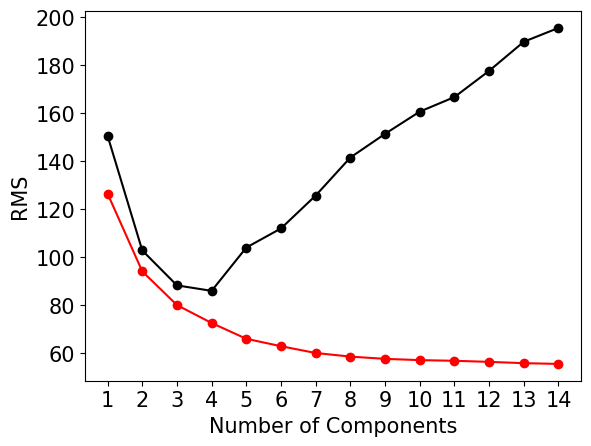

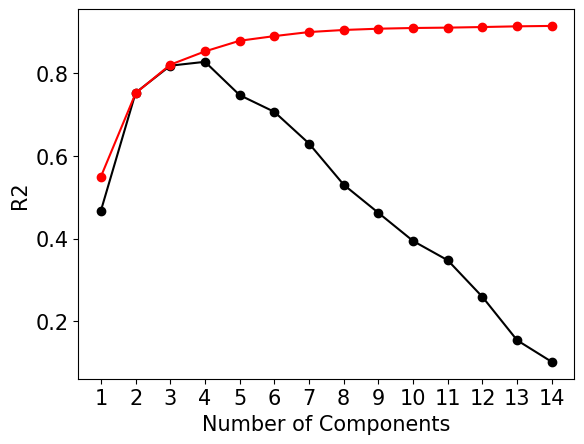

In [4]:
import models
%reload_ext models


perc_split = 0.2
models.pls_model (0.2, moldescriptors_featues, Y)

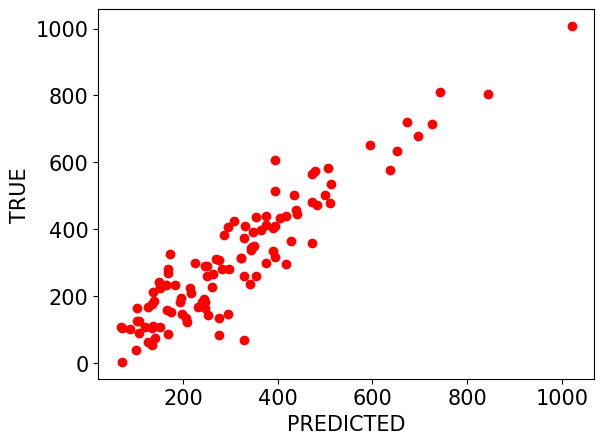

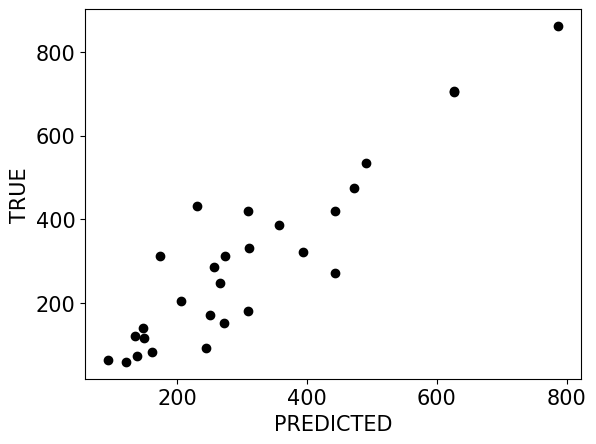

In [7]:
perc_split = 0.2
models.pls_model (0.2, moldescriptors_featues, Y, False, 4)

min_train_rmse_hyper:  {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 10, 'random_state': 42, 'bootstrap': True, 'max_features': 100}
min_test_rmse_hyper:  {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 10, 'random_state': 42, 'bootstrap': True, 'max_features': 100}
max_train_r2_hyper:  {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 10, 'random_state': 42, 'bootstrap': True, 'max_features': 100}
max_test_r2_hyper:  {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 10, 'random_state': 42, 'bootstrap': True, 'max_features': 100}


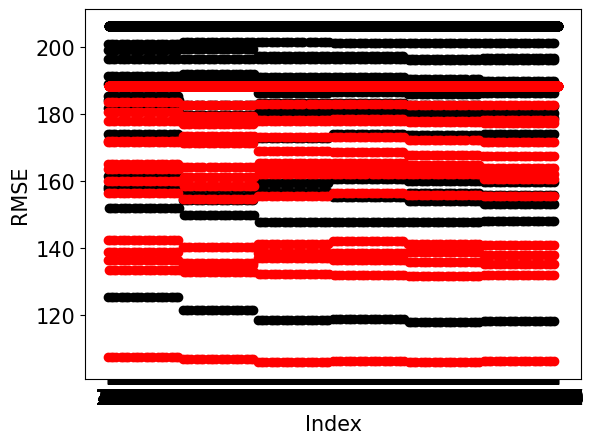

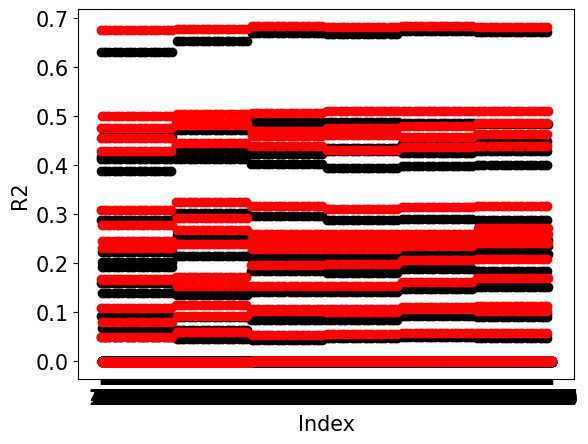

In [8]:
%reload_ext models

perc_split = 0.2

min_train_rmse_hyper, min_test_rmse_hyper, max_train_r2_hyper, max_test_r2_hyper = \
    models.rf_model (0.2, moldescriptors_featues, Y)

/home/redo/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


train_rmse:  178.08201804007615
test_rmse:  196.51308378633448
r2_train:  0.10628384742434893
r2_test:  0.09302670652057676


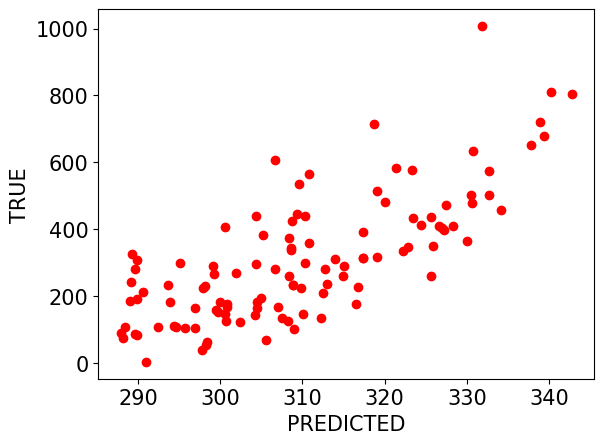

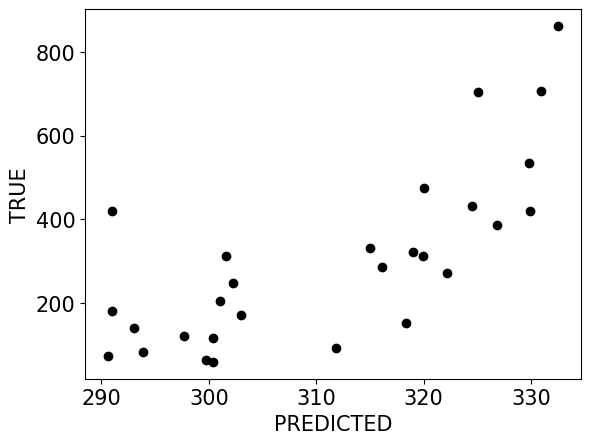

/home/redo/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


train_rmse:  178.08201804007615
test_rmse:  196.51308378633448
r2_train:  0.10628384742434893
r2_test:  0.09302670652057676


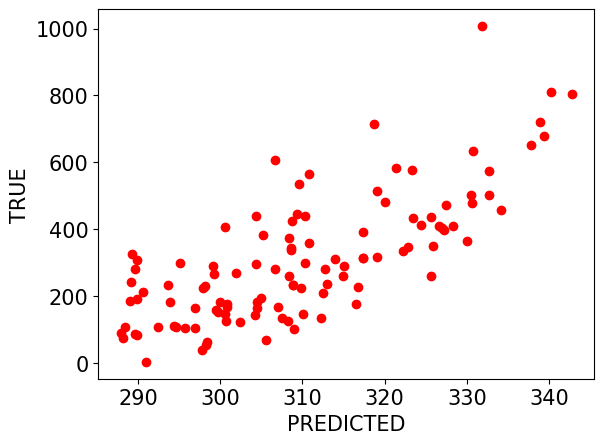

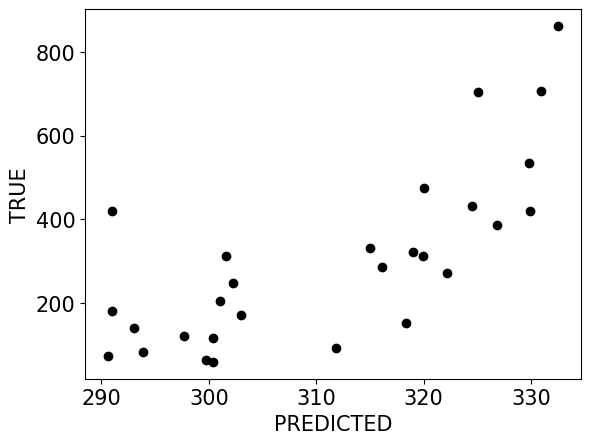

/home/redo/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


train_rmse:  178.08201804007615
test_rmse:  196.51308378633448
r2_train:  0.10628384742434893
r2_test:  0.09302670652057676


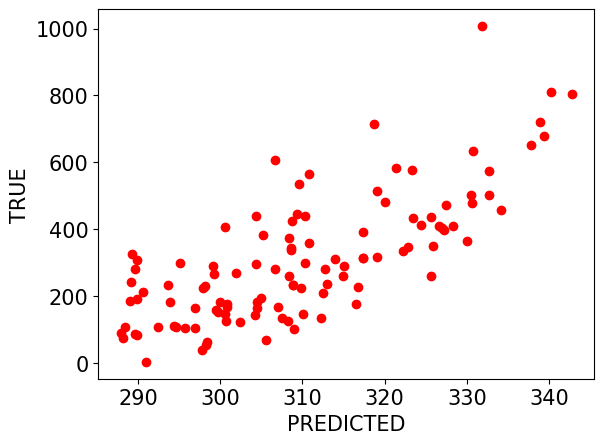

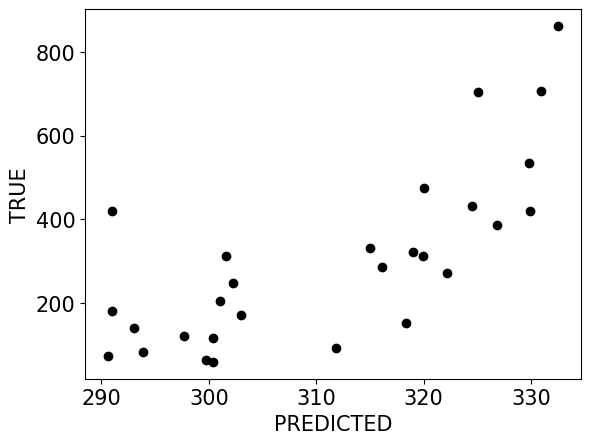

/home/redo/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


train_rmse:  178.08201804007615
test_rmse:  196.51308378633448
r2_train:  0.10628384742434893
r2_test:  0.09302670652057676


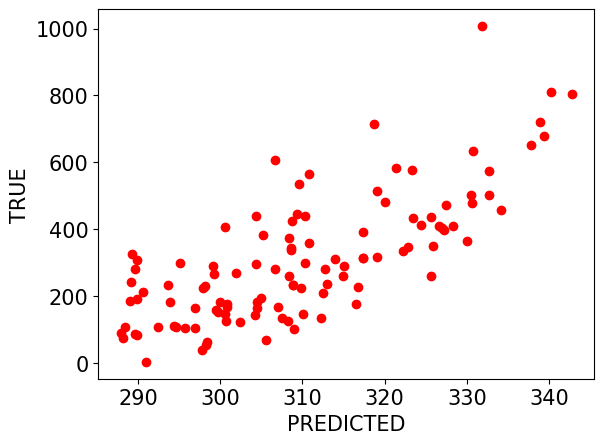

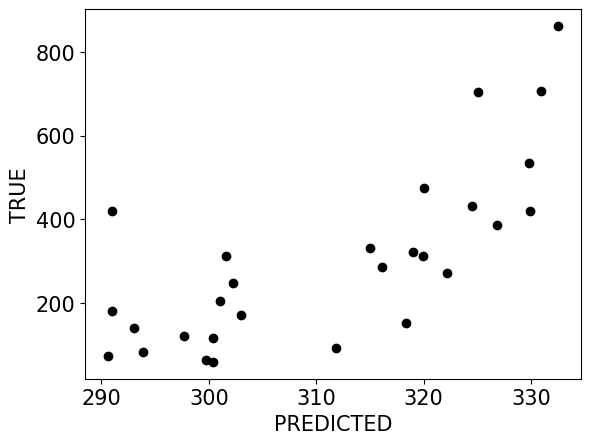

In [9]:
%reload_ext models

for d in [min_train_rmse_hyper, min_test_rmse_hyper, max_train_r2_hyper, max_test_r2_hyper]:
    perc_split = 0.2
    models.rf_model (0.2, moldescriptors_featues, Y, False, [d['n_estimators']], \
                     [d['max_depth']], [d['min_samples_split']], \
                         [d['min_samples_leaf']], [d['random_state']], \
                             [d['bootstrap']], [d['max_features']])
